## Machine Learning 1 - Assignment 2
## Cluster Analysis of Ames Housing Data
**By:** Gavin Kunish

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Cleaning & Prep**

The Ames housing dataset contains various features and attributes of residential homes in Ames, Iowa, USA. For our K-means and Gaussian Mixture models, we selected the following attributes:

-  Lot Area
-  Overall Qual
-  Bedroom AbvGr
-  Gr Liv Area
-  Garage Area
-  Full Bath
-  Half Bath
-  YearsSinceRemod - engineered by subtracting Year Remod/Add from 2010

All features chosen are numeric and all missing values were removed.
Data was split into 70% training data, 30% test data and scaled using Min-Max scaler to scale features to the range [0, 1].

In [ ]:
import pandas as pd
import numpy as np

path = "/content/drive/Shareddrives/Machine Learning 1/AmesHousing.csv"
# Review housing data
housing = pd.read_csv(path)
print(housing.head())

print(housing.shape)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [ ]:
# Filter the 'housing' DataFrame to keep only columns with data types int64 or float64
# These represent integers and floating-point numbers, respectively
numeric_housing = housing.select_dtypes(include=['int64', 'float64'])

# Get the column names of the filtered DataFrame and convert them to a Python list
# Print the list of numeric column names
print(numeric_housing.columns.tolist())

['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [ ]:
# Create a new feature 'YearsSinceRemod' that calculates how many years have passed
# since the house was remodeled, assuming the dataset is from 2010
housing['YearsSinceRemod'] = 2010 - housing['Year Remod/Add']

# Define a list of selected features to focus on for analysis or modeling
selected_features = [
    'SalePrice', 'Lot Area',
    'Overall Qual', 'Bedroom AbvGr',
    'Gr Liv Area', 'Garage Area',
    'Full Bath', 'Half Bath',
    'YearsSinceRemod'
]

# Create a new DataFrame containing only the selected features
feature_housing = housing[selected_features].copy()

# Display the first few rows of the filtered DataFrame to verify it looks correct
feature_housing.head()

,SalePrice,Lot Area,Overall Qual,Bedroom AbvGr,Gr Liv Area,Garage Area,Full Bath,Half Bath,YearsSinceRemod
0,215000,31770,6,3,1656,528.0,1,0,50
1,105000,11622,5,2,896,730.0,1,0,49
2,172000,14267,6,3,1329,312.0,1,1,52
3,244000,11160,7,3,2110,522.0,2,1,42
4,189900,13830,5,3,1629,482.0,2,1,12


In [ ]:
# Check for missing values in each column of the 'feature_housing' DataFrame,
# count how many NA values there are per column, and sort the result in descending order
feature_housing.isna().sum().sort_values(ascending=False)

,0
Garage Area,1
SalePrice,0
Lot Area,0
Bedroom AbvGr,0
Overall Qual,0
Gr Liv Area,0
Full Bath,0
Half Bath,0
YearsSinceRemod,0


In [ ]:
# Calculate the percentage of missing values in each column of 'feature_housing',
# then sort the results in descending order to see which columns have the most missing data
(feature_housing.isna().mean() * 100).sort_values(ascending=False)

,0
Garage Area,0.03413
SalePrice,0.00000
Lot Area,0.00000
Bedroom AbvGr,0.00000
Overall Qual,0.00000
Gr Liv Area,0.00000
Full Bath,0.00000
Half Bath,0.00000
YearsSinceRemod,0.00000


In [ ]:
# Drop any rows in 'feature_housing' that contain missing values
feature_housing = feature_housing.dropna()

# Display the first few rows of the cleaned DataFrame
feature_housing.head()

,SalePrice,Lot Area,Overall Qual,Bedroom AbvGr,Gr Liv Area,Garage Area,Full Bath,Half Bath,YearsSinceRemod
0,215000,31770,6,3,1656,528.0,1,0,50
1,105000,11622,5,2,896,730.0,1,0,49
2,172000,14267,6,3,1329,312.0,1,1,52
3,244000,11160,7,3,2110,522.0,2,1,42
4,189900,13830,5,3,1629,482.0,2,1,12


In [ ]:
# After dropping missing values, verify that there are no remaining NA values
feature_housing.isna().sum().sort_values(ascending = False)

,0
SalePrice,0
Lot Area,0
Overall Qual,0
Bedroom AbvGr,0
Gr Liv Area,0
Garage Area,0
Full Bath,0
Half Bath,0
YearsSinceRemod,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate the features (X) and target variable (y)
X = feature_housing.drop(columns='SalePrice') # Features: all columns except SalePrice
y = feature_housing['SalePrice']              # Target: SalePrice

# Split the data into training and test sets
# 70% training data, 30% test data, and use a fixed random seed for reproducibility
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize a Min-Max scaler to scale features to the range [0, 1]
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train_raw)

# Use the same scaler to transform the test data (do not fit again!)
X_test = scaler.transform(X_test_raw)

In [ ]:
# Print the minimum and maximum value for each feature
# in both the scaled training and testing set
print("Train set min:", np.min(X_train, axis=0))
print("Train set max:", np.max(X_train, axis=0))

print("Test set min:", np.min(X_test, axis=0))
print("Test set max:", np.max(X_test, axis=0))

Train set min: [0. 0. 0. 0. 0. 0. 0. 0.]
Train set max: [1. 1. 1. 1. 1. 1. 1. 1.]
Test set min: [0.00095352 0.         0.         0.01375283 0.         0.
 0.         0.        ]
Test set max: [0.73710533 1.         0.75       0.78033157 0.90591398 1.
 1.         1.        ]


**K-means Clustering**

K-means clustering, from range k=2 to 10, was performed on the training dataset. After reviewing the VAF scree plot, it is clear that after k=4 the gains start to flatten, and we start to see diminishing returns where each additional cluster adds only a small improvement.

In [ ]:
from sklearn.cluster import KMeans

seed = 123

# Calculate the overall mean of the training data (used to compute total variance)
overall_mean = np.mean(X_train, axis = 0)
# Compute the Total Sum of Squares (SST) — total variance of the data
SST = np.sum((X_train - overall_mean) ** 2)

results = [] # List to store clustering results for each k

# Try KMeans clustering for k = 2 to 10
for k in range(2, 11):
    # Initialize KMeans with k clusters, 100 random starts, and fixed random seed
    kmeans = KMeans(n_clusters = k, n_init = 100, random_state = seed)
    # Fit the KMeans algorithm to the training data
    kmeans.fit(X_train)
    # Inertia = Within-cluster sum of squared distances (WSS)
    inertia = kmeans.inertia_
    # VAF (Variance Accounted For) = 1 - (inertia / SST)
    VAF = 1 - (inertia / SST)
    # Get the size (number of points) in each cluster
    cluster_sizes = np.bincount(kmeans.labels_)
    # Get the coordinates of the cluster centers
    centers = kmeans.cluster_centers_
   # Save the results in a dictionary and add to the list
    results.append({
        'k': k,
        'VAF': VAF,
        'inertia': inertia,
        'sizes': cluster_sizes,
        'centers': centers
    })

# Create a summary DataFrame from the results
summary_df = pd.DataFrame({
    'k': [r['k'] for r in results],
    'VAF': [r['VAF'] for r in results],
    'Inertia': [r['inertia'] for r in results],
    'Cluster Sizes': [r['sizes'] for r in results],
    'Centers': [r['centers'] for r in results]
})


In [ ]:
print(summary_df)

    k       VAF     Inertia  \
0   2  0.435161  310.191745   
1   3  0.595737  222.008494   
2   4  0.668169  182.231472   
3   5  0.707842  160.443857   
4   6  0.736448  144.734439   
5   7  0.759306  132.181374   
6   8  0.773986  124.119596   
7   9  0.785563  117.762007   
8  10  0.796882  111.546146   

                                       Cluster Sizes  \
0                                        [848, 1202]   
1                                    [677, 605, 768]   
2                               [668, 534, 624, 224]   
3                          [338, 555, 224, 400, 533]   
4                     [253, 532, 442, 341, 258, 224]   
5                [442, 179, 253, 341, 219, 360, 256]   
6           [337, 220, 180, 360, 219, 253, 122, 359]   
7      [219, 315, 180, 128, 288, 179, 134, 248, 359]   
8  [315, 287, 180, 339, 248, 93, 134, 128, 180, 146]   

                                             Centers  
0  [[0.04049193563678198, 0.4669811320754725, 0.3...  
1  [[0.03882701807

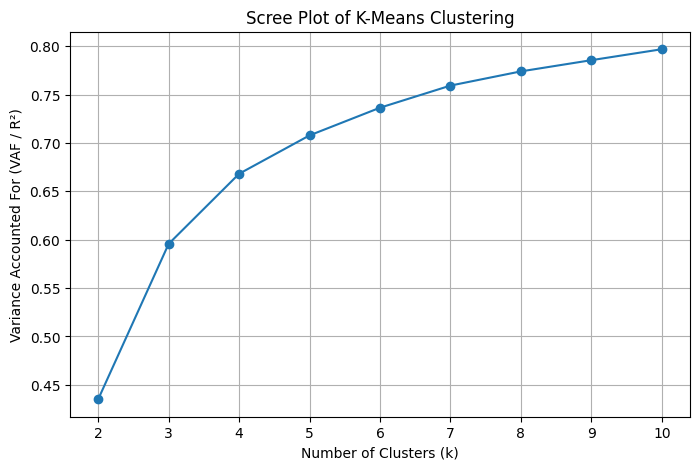

In [ ]:
import matplotlib.pyplot as plt

# Extract k and VAF from the results
k_vals = [r['k'] for r in results]
vafs = [r['VAF'] for r in results]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_vals, vafs, marker='o', linestyle='-')
plt.xticks(k_vals)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Variance Accounted For (VAF / R²)")
plt.title("Scree Plot of K-Means Clustering")
plt.grid(True)
plt.show()

In [ ]:
# Find the clustering result in 'results' where the number of clusters k is 4
# And extract the cluster centers for k=4 from those results
k4_results = next(r for r in results if r['k'] == 4)
k4_centers = k4_results['centers']

# Initialize a new KMeans model for 4 clusters using the previously found centers as initialization
# Set n_init=1 because we are providing explicit initial centers, and fix the random seed for reproducibility
kmeans_test = KMeans(n_clusters = 4, init=k4_centers, n_init = 1, random_state = seed)
# Fit the KMeans model to the test dataset X_test
kmeans_test.fit(X_test)

# Calculate sum of squared distances of samples to their closest cluster center
inertia_test = kmeans_test.inertia_
# Calculate the overall mean of the test dataset
overall_mean_test = np.mean(X_test, axis=0)
# Calculate the total sum of squares (SST) for the test data, measuring total variance around the mean
SST_test = np.sum((X_test - overall_mean_test) ** 2)
# Calculate Variance Accounted For (VAF) on the test data
VAF_test = 1 - (inertia_test / SST_test)

# Count the number of samples assigned to each cluster in the test set
cluster_sizes_test = np.bincount(kmeans_test.labels_)

print(f"Test VAF: {VAF_test:.4f}")
print("Cluster sizes (test):", cluster_sizes_test)


Test VAF: 0.6711
Cluster sizes (test): [270 232 280  97]


**K-means Clustering Summary k=4**

To better understand the underlying structure of our dataset, we applied K-Means clustering with k=4 to our testing dataset, based on the elbow method and variance accounted for. We then analyzed the average values of key home features within each cluster to characterize typical property types. Below is a description of each cluster:

**Cluster 0 - Well-Maintained Mid-Range Homes**
This cluster includes moderately sized homes with decent overall quality and recent renovations. The properties typically have around 1,400 square feet of living space, 2-3 bedrooms, and 1-2 full bathrooms. With average garage and lot sizes, these homes are practical and well-maintained, making them suitable for middle-income buyers who prioritize balance and upkeep.

**Cluster 1 - Larger, High-Quality Family Homes**
Homes in this cluster stand out for their larger size and higher quality finishes. With nearly 1,900 square feet of living space, spacious garages, and multiple bathrooms, they are ideal for families. These properties also show signs of relatively recent updates, suggesting modern appeal and good upkeep. They likely represent the upper segment of the market in this dataset.

**Cluster 2 - Smaller, Older Budget Homes**
This group represents more affordable, compact properties with lower overall quality and minimal modern upgrades. These homes are the smallest in living space and garage area, and have not been remodeled in decades. With fewer bathrooms and simpler layouts, this cluster reflects entry-level or older homes that may require renovation.

**Cluster 3 - Spacious but Dated Homes**
Cluster 3 contains homes that offer relatively generous living and bedroom space, but lag behind in terms of quality and recent upgrades. Though these homes are larger than Cluster 2 and feature additional half baths, their renovation age suggests they may feel outdated. These properties could appeal to buyers looking for space and willing to invest in updates.

Without including home prices in our clustering analysis, we found that the mean home prices strongly support our cluster interpretations. The pricing follows a clear logic based on size, quality, and update status, which suggests our clustering was both valid and meaningful.

In [ ]:
# Get the centers for k=4 (from training set)
centers_k4 = k4_results['centers']

# Convert to DataFrame for readability
cluster_centers_df = pd.DataFrame(centers_k4, columns=X.columns)
cluster_centers_df.index = [f"Cluster {i}" for i in range(4)]

# Reverse the MinMax scaling for easier interpretation (optional but helpful)
cluster_centers_unscaled = pd.DataFrame(
    scaler.inverse_transform(centers_k4),
    columns=X.columns,
    index=[f"Cluster {i}" for i in range(4)]
)

cluster_centers_unscaled

,Lot Area,Overall Qual,Bedroom AbvGr,Gr Liv Area,Garage Area,Full Bath,Half Bath,YearsSinceRemod
Cluster 0,9631.399701,6.416168,2.601796,1418.437126,499.676647,1.684132,2.720046e-15,10.241018
Cluster 1,11117.011236,7.052434,3.093633,1912.632959,568.153558,1.870787,1.014981e+00,9.837079
Cluster 2,10194.339744,5.062500,2.775641,1223.748397,373.908654,1.285256,2.664535e-15,49.818910
Cluster 3,9571.276786,5.589286,3.165179,1516.522321,432.857143,1.205357,1.053571e+00,44.611607


In [ ]:
# Assign training labels
train_labels = KMeans(n_clusters=4, init=k4_centers, n_init=1, random_state=123).fit_predict(X_train)

# Create DataFrame with original values
cluster_summary = pd.DataFrame(X_train_raw)
cluster_summary['Cluster'] = train_labels
cluster_summary['SalePrice'] = y_train.values

# Aggregate sale price by cluster
cluster_price_summary = cluster_summary.groupby('Cluster')['SalePrice'].agg(['mean', 'count'])
cluster_price_summary

,mean,count
Cluster,,
0,191054.495509,668
1,236638.402622,534
2,127296.918269,624
3,150287.616071,224


**Gaussian Mixture Model**

For our next analysis, we used a Gaussian Mixture Model (GMM) to cluster the training data, testing different values of k from 3 to 5. For each model, we recorded the cluster sizes and overall log-likelihood, which measures how well the model fits the data — higher values indicate a better fit. As
k increased, the log-likelihood improved, but we also saw signs of diminishing returns and imbalanced cluster sizes, especially with k=5, where two clusters had very few points. Based on both the log-likelihood and the practical interpretability of the cluster distribution, k=4 appears to be the best choice, offering a strong fit without introducing extremely small or potentially unstable clusters.

In [ ]:
from sklearn.mixture import GaussianMixture

# Initialize an empty list to store results for different numbers of clusters
gmm_results = []

# Loop over the range of cluster counts from 3 to 5 (inclusive)
for k in range(3,6):
    # Create a GaussianMixture model with k components
    # Use 100 random initializations to improve stability and avoid local minima
    # Fix random_state for reproducibility
    gmm = GaussianMixture(n_components = k, n_init = 100, random_state = seed)

    # Fit the GMM model to the training data
    gmm.fit(X_train)

    # Predict cluster labels for each sample in the training data
    # Extract the cluster means (centers) from the fitted model
    # And count how many samples are assigned to each cluster
    labels = gmm.predict(X_train)
    centers = gmm.means_
    cluster_sizes = np.bincount(labels)

    # Calculate the total log-likelihood of the data under the model by multiplying
    # the average log-likelihood per sample (score) by the total number of samples
    log_likelihood = gmm.score(X_train) * len(X_train)

    # Store the results for this model configuration in the results list
    gmm_results.append({
        'k': k,
        'model': gmm,
        'labels': labels,
        'centers': centers,
        'sizes': cluster_sizes,
        'log_likelihood': log_likelihood
    })


for res in gmm_results:
    print(f"GMM k={res['k']} | Cluster sizes: {res['sizes']} | Log-Likelihood: {res['log_likelihood']:.2f}")

GMM k=3 | Cluster sizes: [  51  724 1275] | Log-Likelihood: 24939.07
GMM k=4 | Cluster sizes: [596  73 719 662] | Log-Likelihood: 30869.75
GMM k=5 | Cluster sizes: [ 48 727 592 652  31] | Log-Likelihood: 31072.77


**GMM Clustering Summary k=4**

To uncover distinct groups within our housing dataset, we applied a Gaussian Mixture Model (GMM) with 4 clusters, which was chosen based on log-likelihood and balanced cluster sizes. We then examined the average values of key home features for each cluster to interpret the characteristics that define them. Below is a summary of each GMM cluster:

**Cluster 0 - Balanced, Modern Family Homes**
consists of well-balanced homes with mid-sized lots, average-to-good quality (Overall Qual aprox 6.5), and around 1,577 square feet of living space. These homes typically have 3 bedrooms, 2 full bathrooms, and no half baths. With garage areas averaging over 500 sqft and recent remodeling ( aprox 21 years ago), this cluster represents practical, updated homes likely suitable for small-to-medium families.

**Cluster 1 - Large Lot, Spacious Homes with Light Updates**
Homes in Cluster 1 are defined by very large lots (almost 30,000 sqft on average) and the most spacious layouts (aprox 2,083 sqft), but slightly lower overall quality (aprox 6.16). These homes tend to have more bedrooms, a mix of full and half baths, and larger garages. Despite their size, they have been remodeled less recently (aprox 26 years ago), suggesting a blend of space and aging finishes.

**Cluster 2 - High-Quality, Slightly Smaller but Upgraded Homes**
This cluster features high-quality homes (highest average Overall Qual at 6.63) with aprox 1,770 sqft of living space and solid amenities — full and half baths, garages over 500 sqft, and 3 bedrooms. Remodels happened around 20 years ago, pointing to modern but not brand-new interiors. These homes are slightly more compact than Cluster 1 but make up for it with finish and functionality.

**Cluster 3 - Small, Older, and Simpler Homes**
Cluster 3 represents the smallest and most basic homes in the dataset. With only aprox 1,069 sqft of living area, the lowest quality scores (5.09), and minimal bathrooms and garage space, these homes are likely older, lower-cost options. They were remodeled over 37 years ago, indicating significant aging and likely outdated features.

Similar to the Kmeans clustering, we found that the mean home prices strongly support our cluster interpretations, which suggests our clustering was both valid and meaningful.

In [ ]:
# Retrieve the GMM result dictionary for k=4 clusters from the gmm_results list
gmm_k4 = next(r for r in gmm_results if r['k'] == 4)
# Extract the cluster centers (means) for k=4
centers_gmm = gmm_k4['centers']

# Reverse the scaling transformation applied earlier (using the scaler) to get original feature scales
centers_gmm_unscaled = pd.DataFrame(
    scaler.inverse_transform(centers_gmm),
    columns=X.columns,
    index=[f"GMM Cluster {i}" for i in range(4)]
)

centers_gmm_unscaled

,Lot Area,Overall Qual,Bedroom AbvGr,Gr Liv Area,Garage Area,Full Bath,Half Bath,YearsSinceRemod
GMM Cluster 0,9916.492585,6.501673,2.894226,1576.878309,522.065840,2.000000,0.000000,20.767615
GMM Cluster 1,29549.451355,6.162579,3.156376,2082.753476,604.208142,1.893169,0.806237,26.310451
GMM Cluster 2,9887.796219,6.630858,3.102949,1769.593857,520.821251,1.674112,1.000000,19.743866
GMM Cluster 3,8604.779434,5.091209,2.484148,1069.249417,359.056706,1.000000,0.000000,37.283603


In [ ]:
# Get GMM cluster assignments for training set
gmm_labels = gmm_k4['labels']

# Recreate a DataFrame with raw feature values
gmm_summary_df = pd.DataFrame(X_train_raw.copy())
gmm_summary_df['Cluster'] = gmm_labels
gmm_summary_df['SalePrice'] = y_train.values

# Get average SalePrice per cluster
price_summary = gmm_summary_df.groupby('Cluster')['SalePrice'].agg(['mean', 'median', 'count']).round(0)
price_summary

,mean,median,count
Cluster,,,
0,196640.0,184750.0,596
1,224434.0,194201.0,73
2,210185.0,188900.0,719
3,124446.0,125800.0,662


**K-means and GMM Clustering Conclusion**

We applied both K-Means and Gaussian Mixture Models (GMM) with four clusters to understand the housing dataset structure. K-Means assumes spherical, equally sized clusters and assigned homes into fairly balanced groups, sucessfully distinguishing between larger, higher-quality homes and smaller, older ones. The cluster pricing matched well with these characteristics, validating the results.

GMM allows for more flexible, elliptical clusters and identified more nuanced groups, including a small cluster of homes with very large lots and higher prices. GMM clusters varied more in size, capturing subtle differences that K-Means generalized.

Both methods revealed consistent patterns related to size, quality, and renovation age. K-Means offers clearer, easy-to-interpret segments, while GMM uncovers finer details. Together, they provide complementary insights into the dataset’s structure.

